In [ ]:
#Analyzing distances of trees resulting from raxml-ng runs on morphological data in BIN and MULTI representation
#Consensus Trees over all 100 trees found
#Eval Trees (best tree of all runs)

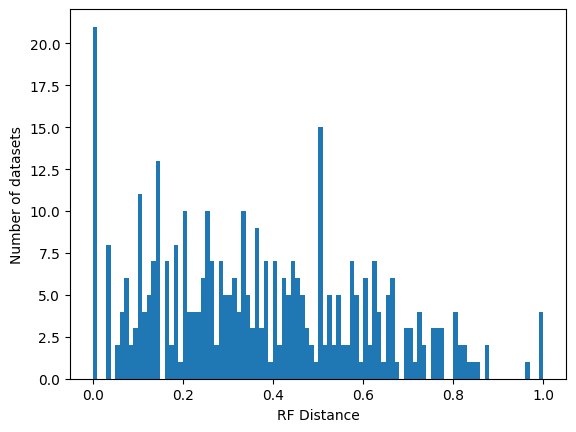

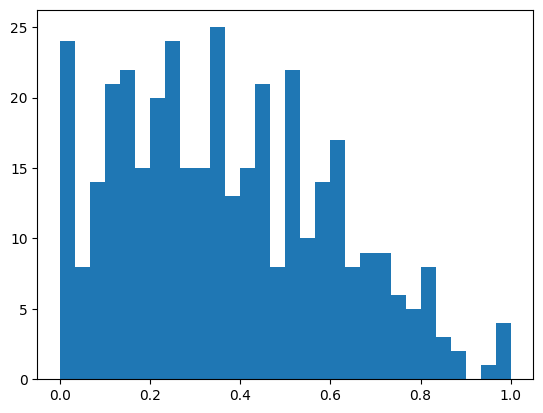

In [4]:
import os
from ete3 import Tree
import pandas as pd
import matplotlib.pyplot as plt

def rf_distance(t1, t2):
    rf, max_rf, common_leaves, parts_t1, parts_t2,discard_t1, discart_t2 = t1.robinson_foulds(t2, unrooted_trees = True)
    if max_rf == 0:
        print("?!")
        return 0
    return rf/max_rf


def rfd_consensus_trees():
    d = "morph_parquets/bin/"
    bin_consensus_trees = {}
    with os.scandir(d) as it:
        for entry in it:
            if not entry.is_dir():
                continue
            tree_path = os.path.join(d, os.path.join(entry.name, "consense.raxml.consensusTreeMR"))
            if not os.path.exists(tree_path):
                print("No consensus tree for " + entry.name)
                continue
            tree = Tree(tree_path)
            tree.resolve_polytomy(recursive=True)
            name = entry.name.split(".")[0]
            bin_consensus_trees[name] = tree
    d = "morph_parquets/multi/"       
    multi_consensus_trees = {}
    with os.scandir(d) as it:
        for entry in it:
            if not entry.is_dir():
                continue
            tree_path = os.path.join(d, os.path.join(entry.name, "consense.raxml.consensusTreeMR"))
            if not os.path.exists(tree_path):
                print("No consensus tree for " + entry.name)
                continue
            tree = Tree(tree_path)
            tree.resolve_polytomy(recursive=True)
            name = entry.name.split(".")[0]
            multi_consensus_trees[name] = tree
    rfds = []
    for (name, bintree) in bin_consensus_trees.items():
        multitree = multi_consensus_trees[name]
        rfds.append(rf_distance(bintree, multitree))
    plt.xlabel("RF Distance")
    plt.ylabel("Number of datasets")
    plt.hist(rfds, bins=100)
    plt.show()
    plt.xlabel("RF Distance")
    plt.ylabel("Number of datasets")
    plt.hist(rfds, bins=30)
    plt.show()
            
rfd_consensus_trees()

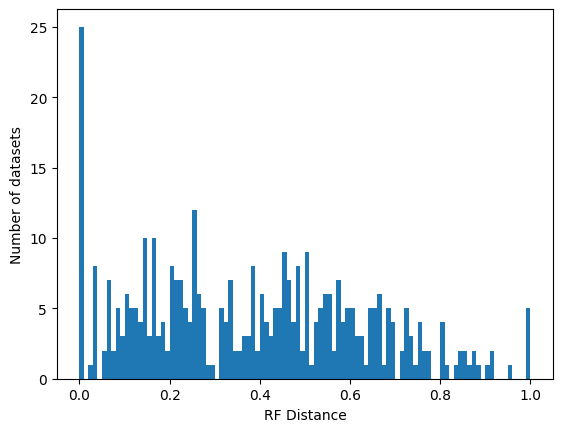

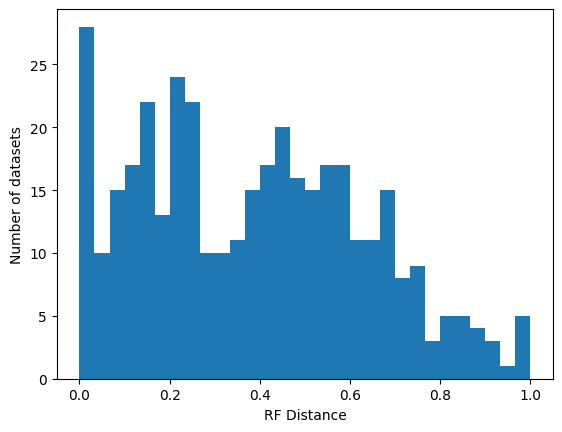

In [6]:
def rfd_eval_trees():
    morph_data_multistate = pd.read_parquet("training_data/morph_data_multistate.parquet")
    morph_data_binarized = pd.read_parquet("training_data/morph_data_binarized.parquet")
    rfds = []
    for index, row in morph_data_multistate.iterrows():
        multitree = Tree(row["newick_eval"])
        name = row['verbose_name'].split('.')[0] + ".BIN.phy"
        bintree =  Tree(morph_data_binarized.loc[(morph_data_binarized['verbose_name'] == name)].iloc[0]["newick_eval"])
        rfd = rf_distance(multitree, bintree)
        rfds.append(rfd)
    plt.xlabel("RF Distance")
    plt.ylabel("Number of datasets")
    plt.hist(rfds, bins=100)
    plt.show()
    plt.xlabel("RF Distance")
    plt.ylabel("Number of datasets")
    plt.hist(rfds, bins=30)
    plt.show()

rfd_eval_trees()